In [ ]:
import numpy as np
from object_mask import ObjectMask, ObjectMaskWithDepth
import matplotlib.pyplot as plt


loaded = np.load("test_maps.npz", allow_pickle=True)

cat_mask = loaded["cat"].item()["mask"]
cat_depth_map = loaded["cat"].item()["depth"]

laptop_mask = loaded["laptop"].item()["mask"]
laptop_depth_map = loaded["laptop"].item()["depth"]

full_depth_map = loaded["full_depth_map"]

In [2]:
cat_mask_obj = ObjectMask("cat", mask=cat_mask)
laptop_mask_obj = ObjectMask("laptop", mask=laptop_mask)

print("Cat area:", cat_mask_obj.area())
print("Laptop area:", laptop_mask_obj.area())

#overlap
print("Are cat and laptop overlapping?", cat_mask_obj.is_overlapping(laptop_mask_obj, padding=0))
for i in range(10):
    if cat_mask_obj.is_overlapping(laptop_mask_obj, padding=i):
        print("Min padding for overlap:", i)
        break

cat_mask_with_depth = ObjectMaskWithDepth.from_objectmask(cat_mask_obj, full_depth_map)
laptop_mask_with_depth = ObjectMaskWithDepth.from_objectmask(laptop_mask_obj, full_depth_map)

Cat area: 54529
Laptop area: 97974
Are cat and laptop overlapping? False
Min padding for overlap: 2


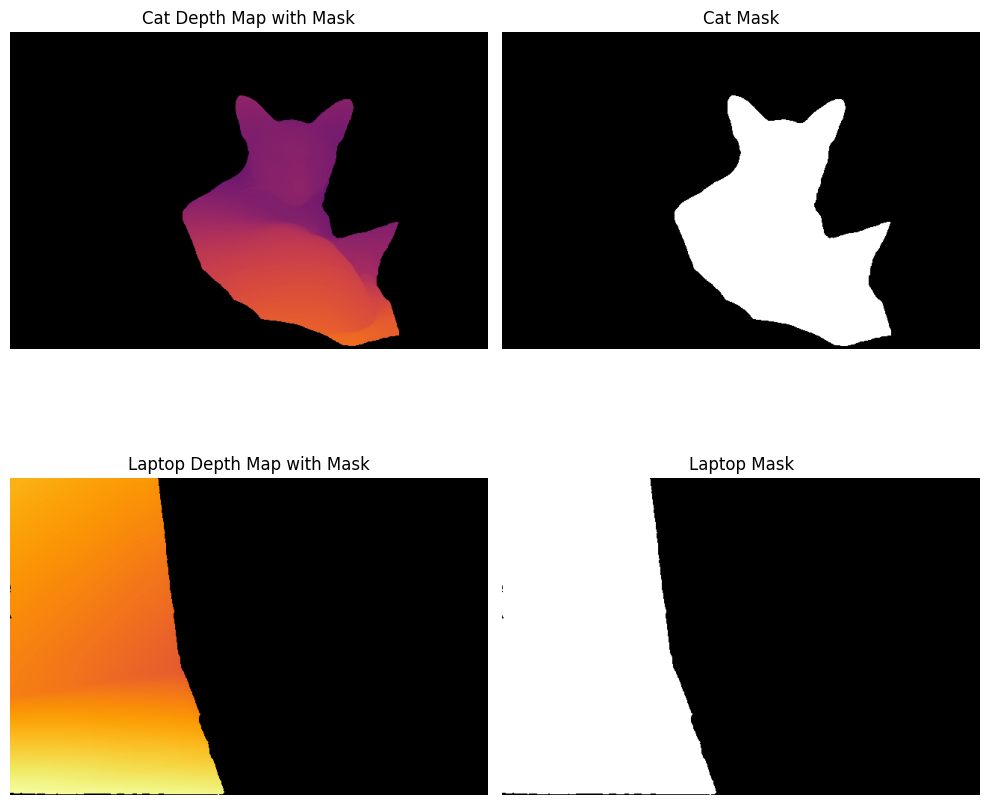

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(cat_mask_with_depth.render_depth_image())
axs[0, 0].set_title("Cat Depth Map with Mask")
axs[0, 1].imshow(cat_mask, cmap='gray')
axs[0, 1].set_title("Cat Mask")
axs[1, 0].imshow(laptop_mask_with_depth.render_depth_image())
axs[1, 0].set_title("Laptop Depth Map with Mask")
axs[1, 1].imshow(laptop_mask, cmap='gray')
axs[1, 1].set_title("Laptop Mask")
for ax in axs.flat:
    ax.axis('off')
plt.tight_layout()

In [5]:
print("Cat is deeper?")
print(cat_mask_with_depth.is_deeper_than(laptop_mask_with_depth, 3))

print("laptop is deeper?")
print(laptop_mask_with_depth.is_deeper_than(cat_mask_with_depth, 3))


Cat is deeper?
True
laptop is deeper?
False
